<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [2]:
# Something new to install...
#! pip install plotly

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

### I. Get Data Ready

In [5]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [6]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [8]:
# Nulls
# No null 

In [9]:
# Filter Data to Most Recent Year
# Find what's the recent year in the data
print (df['year'].max())

2007


In [10]:
# Create new DataFrame to store where year is 2007
df_2007 = df[df['year'] == 2007]

In [11]:
# Set Country to Index
df_2007 = df_2007.set_index('country')

# Check work
print(df_2007.head())

            continent  year  lifeExp       pop   gdpPercap iso_alpha  iso_num
country                                                                      
Afghanistan      Asia  2007 43.82800  31889923   974.58034       AFG        4
Albania        Europe  2007 76.42300   3600523  5937.02953       ALB        8
Algeria        Africa  2007 72.30100  33333216  6223.36747       DZA       12
Angola         Africa  2007 42.73100  12420476  4797.23127       AGO       24
Argentina    Americas  2007 75.32000  40301927 12779.37964       ARG       32


In [12]:
# Drop `iso_alpha`, `year`, and `iso_num` 
# We focus only year 2007
df_2007 = df_2007.drop(['iso_alpha', 'year', 'iso_num'], axis=1)

In [13]:
# Check work
df_2007.columns

Index(['continent', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [14]:
# How many countries in each continent?
df_2007.groupby('continent').size() # Use .size to count the 'country' which already been set as index. 

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
dtype: int64

In [15]:
# Get dummies!
# Get dummies for 'continent' columns
df_2007 = pd.get_dummies(df_2007, columns=['continent'])

In [16]:
# Head (again!)
df_2007.head()

,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,False,False,True,False,False
Albania,76.42300,3600523,5937.02953,False,False,False,True,False
Algeria,72.30100,33333216,6223.36747,True,False,False,False,False
Angola,42.73100,12420476,4797.23127,True,False,False,False,False
Argentina,75.32000,40301927,12779.37964,False,True,False,False,False


In [17]:
# Define X
X = df_2007[['lifeExp','pop', 'gdpPercap', 'continent_Africa', 'continent_Americas',
       'continent_Asia', 'continent_Europe', 'continent_Oceania']]
X.shape
# Scale Features
sc = StandardScaler()
X_scaled = sc.fit_transform(df_2007)

In [18]:
# Define X
X = df_2007[['lifeExp','pop', 'gdpPercap', 'continent_Africa', 'continent_Americas',
       'continent_Asia', 'continent_Europe', 'continent_Oceania']]
X.shape

(142, 8)

In [19]:
# Scale Features
sc = StandardScaler()
X_scaled = sc.fit_transform(df_2007)

### II. K-Means Clustering Model

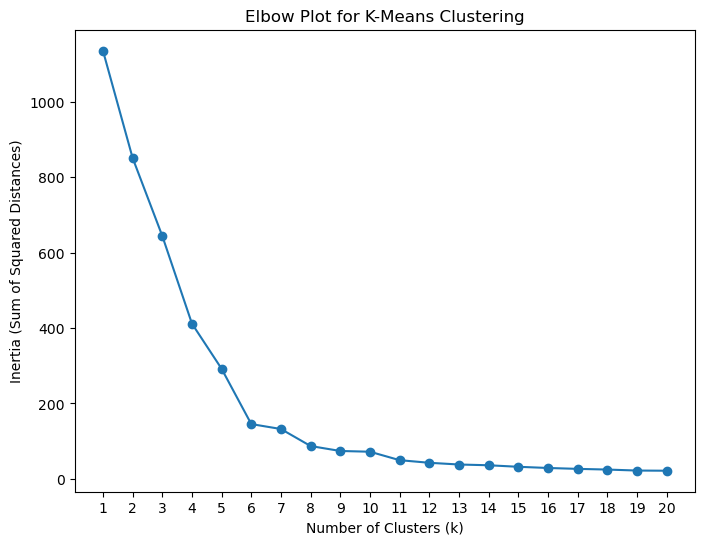

In [21]:
# Elbow Plot

inertia_list = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Fit KMeans model
    inertia_list.append(kmeans.inertia_)  # Append inertia (sum of squared distances)

# Plot the Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), inertia_list, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range(1, 21))
plt.show()

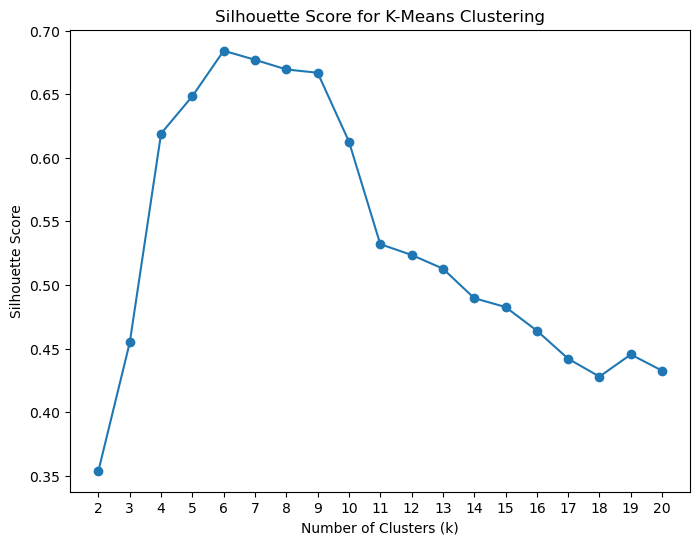

In [22]:
# Silhouette Score

silhouette_list = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Fit the KMeans model
    labels = kmeans.labels_  # Get the cluster labels
    score = silhouette_score(X_scaled, labels)  # Calculate the silhouette score
    silhouette_list.append(score)  # Append the score to the list

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 21), silhouette_list, marker='o')
plt.title('Silhouette Score for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 21))
plt.show()

In [23]:
# Find the best silhouette score and corresponding k
print(f'Best Silhouette Score: {max(silhouette_list)}')

Best Silhouette Score: 0.684136286873593


#### Based off of our metrics above, which k should we try first?

Answer Here:



In [26]:
# Elbow plot
# The inertia starts decreasing as the more clusters added. The plot starts to show elbow shape between k 5-7

# Silhouette Score
# The plot shows the highers silhouette score at cluster = 2

# Based on the plot, I will try k 2 - 5

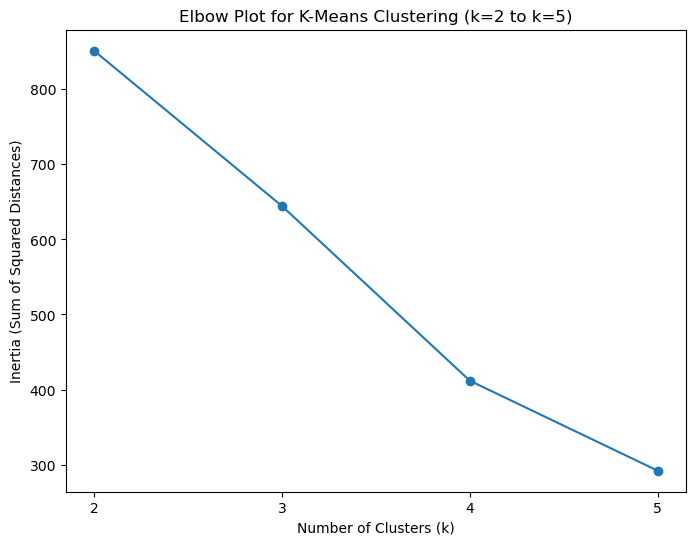

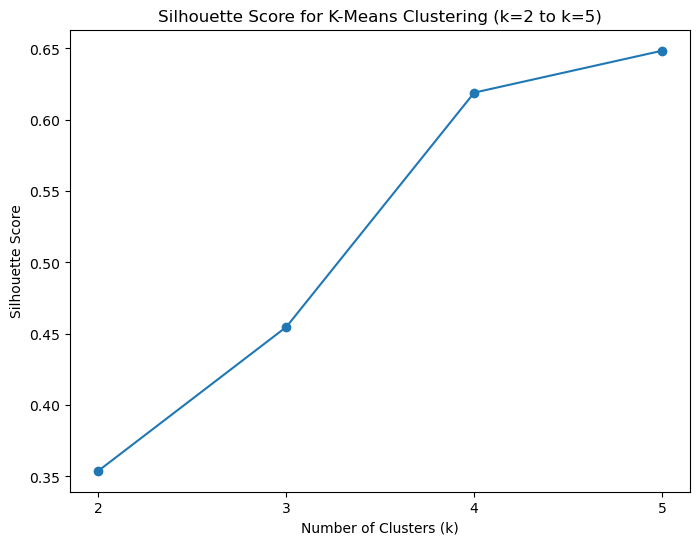

In [27]:
# List to store results for each k
inertia_list = []
silhouette_list = []

# Try models with k=2, k=3, k=4, k=5
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  
    labels = kmeans.labels_  # Get the cluster labels
    inertia_list.append(kmeans.inertia_)  
    silhouette_list.append(silhouette_score(X_scaled, labels))  

# Plot the Elbow Plot (Inertia)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), inertia_list, marker='o')
plt.title('Elbow Plot for K-Means Clustering (k=2 to k=5)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range(2, 6))
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), silhouette_list, marker='o')
plt.title('Silhouette Score for K-Means Clustering (k=2 to k=5)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 6))
plt.show()

In [28]:
# Silhouette Score
print(f"Silhouette Score for k={k}: {score}")

Silhouette Score for k=5: 0.4326173418205968


#### Visualize Your Clusters!

In [30]:
# Add cluster column

# Apply KMeans clustering 
kmeans = KMeans(n_clusters=6, random_state=42)  
df_2007['cluster'] = kmeans.fit_predict(X)  # Clustering based on the selected features
df_2007.head()

,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,cluster
country,,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,False,False,True,False,False,0
Albania,76.42300,3600523,5937.02953,False,False,False,True,False,0
Algeria,72.30100,33333216,6223.36747,True,False,False,False,False,3
Angola,42.73100,12420476,4797.23127,True,False,False,False,False,0
Argentina,75.32000,40301927,12779.37964,False,True,False,False,False,3


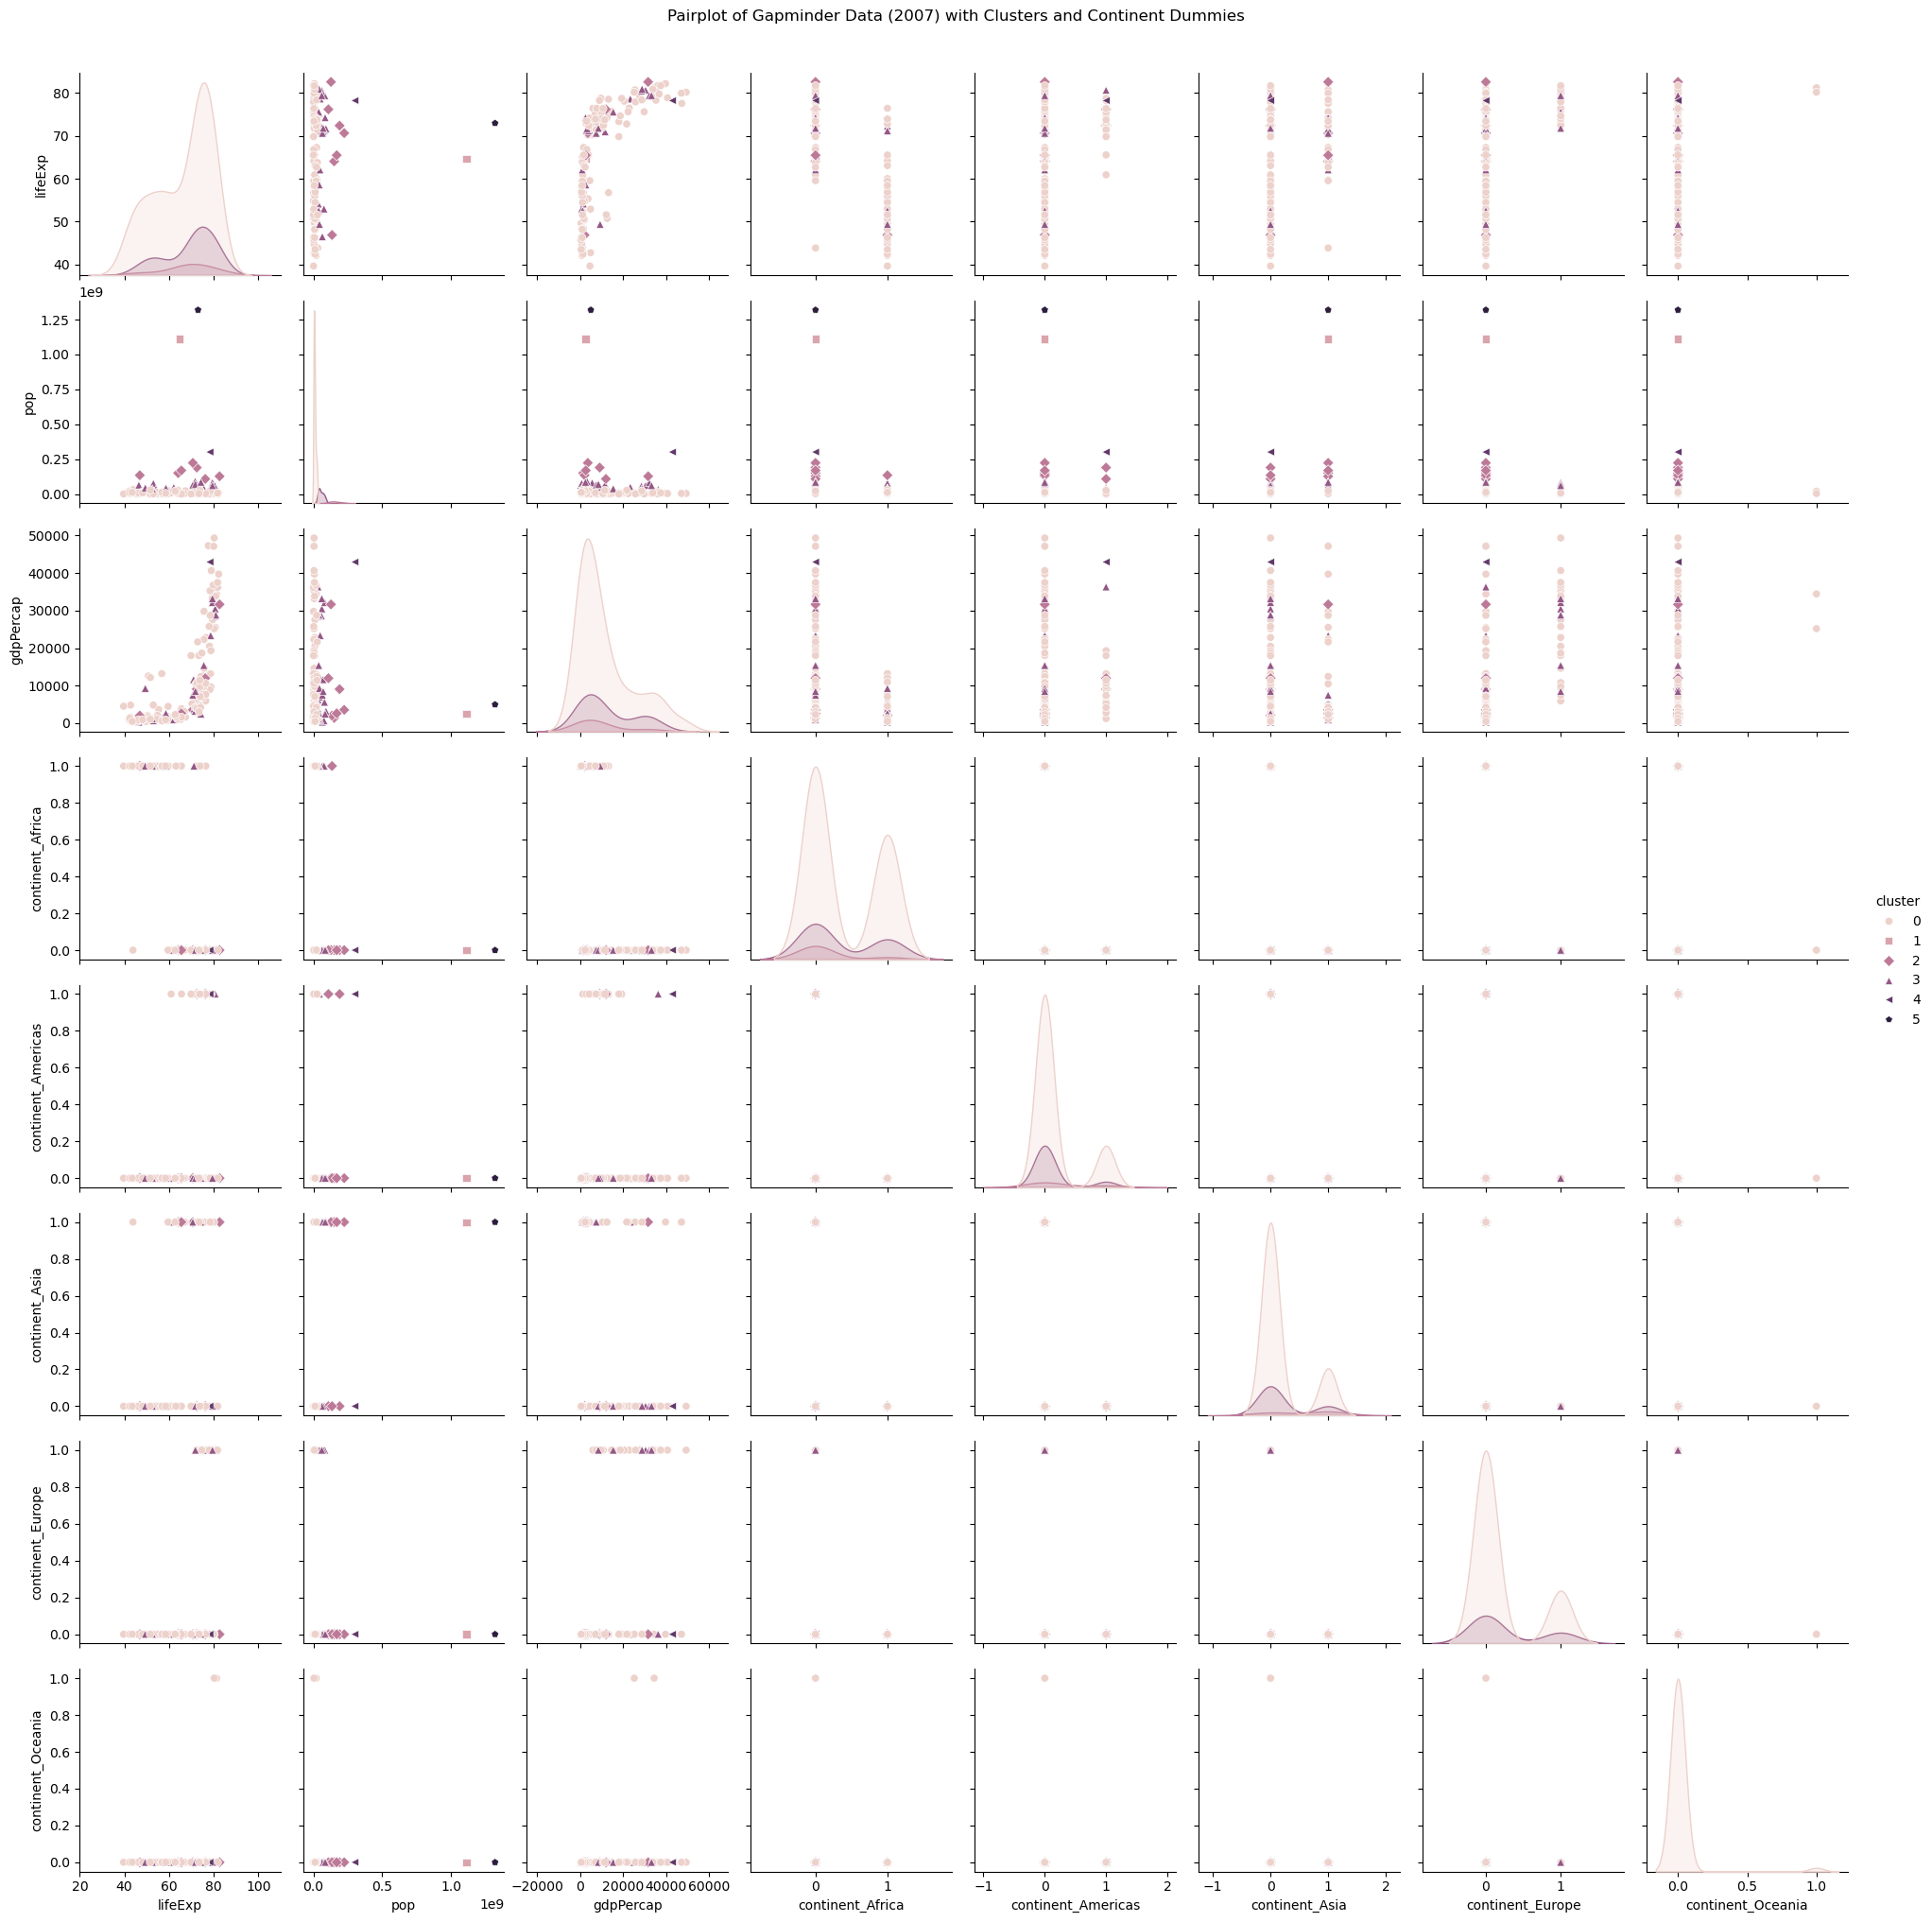

In [31]:
# Method 1: Pairplots/Scatterplots
# Create pairplot to visualize the relationships between features including continent dummies
sns.pairplot(df_2007[['lifeExp', 'pop', 'gdpPercap', 'continent_Africa', 'continent_Americas', 
                      'continent_Asia', 'continent_Europe', 'continent_Oceania', 'cluster']], 
             hue='cluster',  # Color by cluster
             diag_kind='kde',  # Density plots on the diagonal
             markers=["o", "s", "D", "^","<", "p"])  # Different markers for each cluster

# Show the plot
plt.suptitle("Pairplot of Gapminder Data (2007) with Clusters and Continent Dummies", y=1.02)
plt.show()

In [32]:
# Method 2: Groupby
# Grouping by the 'cluster' 
cluster_summary = df_2007.groupby('cluster').mean()

# Display the summary statistics for each cluster
cluster_summary

,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
cluster,,,,,,,,
0,66.23169,9623189.80374,11520.97141,0.39252,0.17757,0.19626,0.21495,0.01869
1,64.69800,1110396331.00000,2452.21041,0.00000,0.00000,1.00000,0.00000,0.00000
2,68.32029,157782375.71429,8893.03916,0.14286,0.28571,0.57143,0.00000,0.00000
3,69.36480,55465434.64000,12528.48021,0.36000,0.12000,0.24000,0.28000,0.00000
4,78.24200,301139947.00000,42951.65309,0.00000,1.00000,0.00000,0.00000,0.00000
5,72.96100,1318683096.00000,4959.11485,0.00000,0.00000,1.00000,0.00000,0.00000


#### An Even Closer Look...Which countries are in each of these clusters?

In [34]:
for cluster in sorted(df_2007['cluster'].unique()):
    print(f"Cluster {cluster}:")
    countries_in_cluster = df_2007[df_2007['cluster'] == cluster].index
    print(countries_in_cluster.tolist())  # Print countries in the cluster
    print("\n")

Cluster 0:
['Afghanistan', 'Albania', 'Angola', 'Australia', 'Austria', 'Bahrain', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Comoros', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Finland', 'Gabon', 'Gambia', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'Iraq', 'Ireland', 'Israel', 'Jamaica', 'Jordan', 'Korea, Dem. Rep.', 'Kuwait', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mongolia', 'Montenegro', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Portugal', 'Puerto Rico', 'Reunion', 

### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Visualize your clusters
- Determine your best silhouette score
- Is this better or worse than KMeans?
- Which countries are in each cluster?

In [36]:
sc = StandardScaler()
sc_features = sc.fit_transform(X)

In [37]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=3, min_samples=6)

# Fit the DBSCAN model and assign clusters to the 'cluster' column
df_2007['cluster_db'] = dbscan.fit_predict(sc_features)

# Calculate the silhouette score
sil_score = silhouette_score(sc_features, df_2007['cluster_db'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.6596891219065234


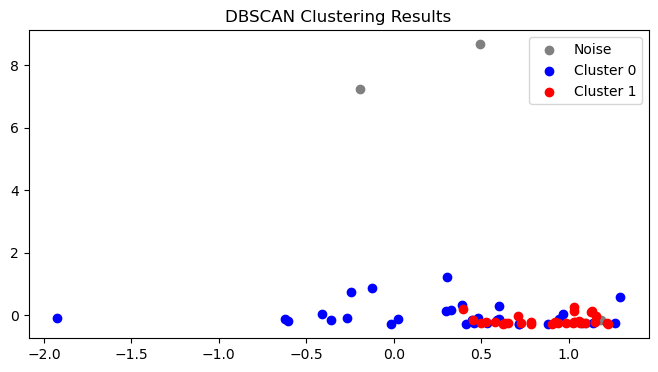

In [38]:
# Plot
plt.figure(figsize=(8,4))

colors = {-1:'gray', 0: 'blue', 1: 'red'} # Color map for each label
labels = {-1: 'Noise', 0: 'Cluster 0', 1: 'Cluster 1'} # Legend labels


for label, color in colors.items():
    mask = dbscan.labels_ == label
    plt.scatter(sc_features[mask, 0], sc_features[mask, 1], c=color, label=labels[label])

plt.title('DBSCAN Clustering Results')
plt.legend()
plt.show()

In [39]:
# K-means 
# kmeans = KMeans(n_clusters=6) 
# Silhouette Score for k=5: 0.4326173418205968

# DBScan
# dbscan = DBSCAN(eps=3, min_samples=6) 
# Silhouette Score 0.6596891219065234

# In this case DBSCAN(eps=3, min_samples=6)  performs better than KMeans(n_clusters=6)

In [40]:
# Which countries are in each cluster?

for cluster in sorted(df_2007['cluster_db'].unique()):
    print(f"Cluster {cluster}:")
    countries_in_cluster = df_2007[df_2007['cluster_db'] == cluster].index
    print(countries_in_cluster.tolist())  # Print countries in the cluster
    print("\n")

Cluster -1:
['Australia', 'China', 'India', 'New Zealand']


Cluster 0:
['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'Hong Kong, China', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait', 'Lebanon', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 'Taiwan', 'Thailand', 'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.']


Cluster 1:
['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']


Cluster 2:
['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Re

### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 